# Introduction

Same as other notebook, except I use the huber look. Apparently this gives more stable learning. See the second link below for source code.

https://medium.com/emergent-future/simple-reinforcement-learning-with-tensorflow-part-0-q-learning-with-tables-and-neural-networks-d195264329d0


https://github.com/keon/deep-q-learning/blob/master/ddqn.py


### Setup

In [1]:
import random
import gym
import numpy as np
from collections import deque
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras import backend as K

EPISODES = 5000


class DQNAgent:
    def __init__(self, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size
        self.memory = deque(maxlen=2000)
        self.gamma = 0.95    # discount rate
        self.epsilon = 1.0  # exploration rate
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.99
        self.learning_rate = 0.001
        self.model = self._build_model()
        self.target_model = self._build_model()
        self.update_target_model()

    def _huber_loss(self, target, prediction):
        # sqrt(1+error^2)-1
        error = prediction - target
        return K.mean(K.sqrt(1+K.square(error))-1, axis=-1)

    def _build_model(self):
        # Neural Net for Deep-Q learning Model
        model = Sequential()
        model.add(Dense(24, input_dim=self.state_size, activation='relu'))
        model.add(Dense(24, activation='relu'))
        model.add(Dense(self.action_size, activation='linear'))
        model.compile(loss=self._huber_loss,
                      optimizer=Adam(lr=self.learning_rate))
        return model

    def update_target_model(self):
        # copy weights from model to target_model
        self.target_model.set_weights(self.model.get_weights())

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def act(self, state):
        if np.random.rand() <= self.epsilon:
            return random.randrange(self.action_size)
        act_values = self.model.predict(state)
        return np.argmax(act_values[0])  # returns action

    def replay(self, batch_size):
        minibatch = random.sample(self.memory, batch_size)
        for state, action, reward, next_state, done in minibatch:
            target = self.model.predict(state)
            if done:
                target[0][action] = reward
            else:
                # a = self.model.predict(next_state)[0]
                t = self.target_model.predict(next_state)[0]
                target[0][action] = reward + self.gamma * np.amax(t)
                # target[0][action] = reward + self.gamma * t[np.argmax(a)]
            self.model.fit(state, target, epochs=1, verbose=0)
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

    def load(self, name):
        self.model.load_weights(name)

    def save(self, name):
        self.model.save_weights(name)


if __name__ == "__main__":
    env = gym.make('CartPole-v1')
    state_size = env.observation_space.shape[0]
    action_size = env.action_space.n
    agent = DQNAgent(state_size, action_size)
    # agent.load("./save/cartpole-ddqn.h5")
    done = False
    batch_size = 32

    for e in range(EPISODES):
        state = env.reset()
        state = np.reshape(state, [1, state_size])
        for time in range(500):
            # env.render()
            action = agent.act(state)
            next_state, reward, done, _ = env.step(action)
            reward = reward if not done else -10
            next_state = np.reshape(next_state, [1, state_size])
            agent.remember(state, action, reward, next_state, done)
            state = next_state
            if done:
                agent.update_target_model()
                print("episode: {}/{}, score: {}, e: {:.2}"
                      .format(e, EPISODES, time, agent.epsilon))
                break
            if len(agent.memory) > batch_size:
                agent.replay(batch_size)
        # if e % 10 == 0:
        #     agent.save("./save/cartpole-ddqn.h5")

/home/kokeeffe/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


WARN: gym.spaces.Box autodetected dtype as <type 'numpy.float32'>. Please provide explicit dtype.
episode: 0/5000, score: 14, e: 1.0
episode: 1/5000, score: 11, e: 1.0
episode: 2/5000, score: 21, e: 0.85
episode: 3/5000, score: 8, e: 0.79
episode: 4/5000, score: 12, e: 0.7
episode: 5/5000, score: 8, e: 0.64
episode: 6/5000, score: 10, e: 0.58
episode: 7/5000, score: 9, e: 0.53
episode: 8/5000, score: 10, e: 0.48
episode: 9/5000, score: 19, e: 0.4
episode: 10/5000, score: 9, e: 0.36
episode: 11/5000, score: 19, e: 0.3
episode: 12/5000, score: 17, e: 0.25
episode: 13/5000, score: 20, e: 0.21
episode: 14/5000, score: 10, e: 0.19
episode: 15/5000, score: 17, e: 0.16
episode: 16/5000, score: 23, e: 0.12
episode: 17/5000, score: 31, e: 0.091
episode: 18/5000, score: 29, e: 0.068
episode: 19/5000, score: 54, e: 0.04
episode: 20/5000, score: 92, e: 0.016
episode: 21/5000, score: 86, e: 0.0099
episode: 22/5000, score: 97, e: 0.0099
episode: 23/5000, score: 85, e: 0.0099
episode: 24/5000, score:

episode: 204/5000, score: 97, e: 0.0099
episode: 205/5000, score: 499, e: 0.0099
episode: 206/5000, score: 132, e: 0.0099
episode: 207/5000, score: 19, e: 0.0099
episode: 208/5000, score: 8, e: 0.0099
episode: 209/5000, score: 38, e: 0.0099
episode: 210/5000, score: 87, e: 0.0099
episode: 211/5000, score: 90, e: 0.0099
episode: 212/5000, score: 117, e: 0.0099
episode: 213/5000, score: 109, e: 0.0099
episode: 214/5000, score: 172, e: 0.0099
episode: 215/5000, score: 16, e: 0.0099
episode: 216/5000, score: 64, e: 0.0099
episode: 217/5000, score: 63, e: 0.0099
episode: 218/5000, score: 73, e: 0.0099
episode: 219/5000, score: 70, e: 0.0099
episode: 220/5000, score: 92, e: 0.0099
episode: 221/5000, score: 20, e: 0.0099
episode: 222/5000, score: 50, e: 0.0099
episode: 223/5000, score: 22, e: 0.0099
episode: 224/5000, score: 13, e: 0.0099
episode: 225/5000, score: 15, e: 0.0099
episode: 226/5000, score: 98, e: 0.0099
episode: 227/5000, score: 136, e: 0.0099
episode: 228/5000, score: 73, e: 0.

episode: 408/5000, score: 21, e: 0.0099
episode: 409/5000, score: 23, e: 0.0099
episode: 410/5000, score: 31, e: 0.0099
episode: 411/5000, score: 16, e: 0.0099
episode: 412/5000, score: 19, e: 0.0099
episode: 413/5000, score: 15, e: 0.0099
episode: 414/5000, score: 103, e: 0.0099
episode: 415/5000, score: 17, e: 0.0099
episode: 416/5000, score: 136, e: 0.0099
episode: 417/5000, score: 29, e: 0.0099
episode: 418/5000, score: 23, e: 0.0099
episode: 419/5000, score: 65, e: 0.0099
episode: 420/5000, score: 56, e: 0.0099
episode: 421/5000, score: 100, e: 0.0099
episode: 422/5000, score: 26, e: 0.0099
episode: 423/5000, score: 43, e: 0.0099
episode: 424/5000, score: 21, e: 0.0099
episode: 425/5000, score: 70, e: 0.0099
episode: 426/5000, score: 78, e: 0.0099
episode: 427/5000, score: 79, e: 0.0099
episode: 428/5000, score: 67, e: 0.0099
episode: 429/5000, score: 170, e: 0.0099
episode: 430/5000, score: 102, e: 0.0099
episode: 431/5000, score: 97, e: 0.0099
episode: 432/5000, score: 94, e: 0.

episode: 612/5000, score: 40, e: 0.0099
episode: 613/5000, score: 127, e: 0.0099
episode: 614/5000, score: 353, e: 0.0099
episode: 615/5000, score: 134, e: 0.0099
episode: 616/5000, score: 37, e: 0.0099
episode: 617/5000, score: 80, e: 0.0099
episode: 618/5000, score: 122, e: 0.0099
episode: 619/5000, score: 114, e: 0.0099
episode: 620/5000, score: 103, e: 0.0099
episode: 621/5000, score: 96, e: 0.0099
episode: 622/5000, score: 98, e: 0.0099
episode: 623/5000, score: 95, e: 0.0099
episode: 624/5000, score: 60, e: 0.0099
episode: 625/5000, score: 94, e: 0.0099
episode: 626/5000, score: 40, e: 0.0099
episode: 627/5000, score: 130, e: 0.0099
episode: 628/5000, score: 90, e: 0.0099
episode: 629/5000, score: 35, e: 0.0099
episode: 630/5000, score: 85, e: 0.0099
episode: 631/5000, score: 67, e: 0.0099
episode: 632/5000, score: 197, e: 0.0099
episode: 633/5000, score: 11, e: 0.0099
episode: 634/5000, score: 20, e: 0.0099
episode: 635/5000, score: 97, e: 0.0099
episode: 636/5000, score: 499, e

episode: 815/5000, score: 15, e: 0.0099
episode: 816/5000, score: 14, e: 0.0099
episode: 817/5000, score: 14, e: 0.0099
episode: 818/5000, score: 70, e: 0.0099
episode: 819/5000, score: 21, e: 0.0099
episode: 820/5000, score: 25, e: 0.0099
episode: 821/5000, score: 101, e: 0.0099
episode: 822/5000, score: 23, e: 0.0099
episode: 823/5000, score: 84, e: 0.0099
episode: 824/5000, score: 49, e: 0.0099
episode: 825/5000, score: 41, e: 0.0099
episode: 826/5000, score: 44, e: 0.0099
episode: 827/5000, score: 113, e: 0.0099
episode: 828/5000, score: 73, e: 0.0099
episode: 829/5000, score: 54, e: 0.0099
episode: 830/5000, score: 146, e: 0.0099
episode: 831/5000, score: 125, e: 0.0099
episode: 832/5000, score: 95, e: 0.0099
episode: 833/5000, score: 109, e: 0.0099
episode: 834/5000, score: 17, e: 0.0099
episode: 835/5000, score: 36, e: 0.0099
episode: 836/5000, score: 17, e: 0.0099
episode: 837/5000, score: 26, e: 0.0099
episode: 838/5000, score: 28, e: 0.0099
episode: 839/5000, score: 22, e: 0.

episode: 1019/5000, score: 24, e: 0.0099
episode: 1020/5000, score: 23, e: 0.0099
episode: 1021/5000, score: 106, e: 0.0099
episode: 1022/5000, score: 95, e: 0.0099
episode: 1023/5000, score: 65, e: 0.0099
episode: 1024/5000, score: 104, e: 0.0099
episode: 1025/5000, score: 42, e: 0.0099
episode: 1026/5000, score: 27, e: 0.0099
episode: 1027/5000, score: 25, e: 0.0099
episode: 1028/5000, score: 20, e: 0.0099
episode: 1029/5000, score: 22, e: 0.0099
episode: 1030/5000, score: 48, e: 0.0099
episode: 1031/5000, score: 27, e: 0.0099
episode: 1032/5000, score: 53, e: 0.0099
episode: 1033/5000, score: 18, e: 0.0099
episode: 1034/5000, score: 20, e: 0.0099
episode: 1035/5000, score: 64, e: 0.0099
episode: 1036/5000, score: 23, e: 0.0099
episode: 1037/5000, score: 54, e: 0.0099
episode: 1038/5000, score: 43, e: 0.0099
episode: 1039/5000, score: 23, e: 0.0099
episode: 1040/5000, score: 13, e: 0.0099
episode: 1041/5000, score: 29, e: 0.0099
episode: 1042/5000, score: 29, e: 0.0099
episode: 1043/

episode: 1219/5000, score: 18, e: 0.0099
episode: 1220/5000, score: 72, e: 0.0099
episode: 1221/5000, score: 134, e: 0.0099
episode: 1222/5000, score: 88, e: 0.0099
episode: 1223/5000, score: 95, e: 0.0099
episode: 1224/5000, score: 24, e: 0.0099
episode: 1225/5000, score: 12, e: 0.0099
episode: 1226/5000, score: 18, e: 0.0099
episode: 1227/5000, score: 32, e: 0.0099
episode: 1228/5000, score: 15, e: 0.0099
episode: 1229/5000, score: 63, e: 0.0099
episode: 1230/5000, score: 27, e: 0.0099
episode: 1231/5000, score: 52, e: 0.0099
episode: 1232/5000, score: 23, e: 0.0099
episode: 1233/5000, score: 14, e: 0.0099
episode: 1234/5000, score: 40, e: 0.0099
episode: 1235/5000, score: 88, e: 0.0099
episode: 1236/5000, score: 93, e: 0.0099
episode: 1237/5000, score: 76, e: 0.0099
episode: 1238/5000, score: 75, e: 0.0099
episode: 1239/5000, score: 91, e: 0.0099
episode: 1240/5000, score: 40, e: 0.0099
episode: 1241/5000, score: 11, e: 0.0099
episode: 1242/5000, score: 23, e: 0.0099
episode: 1243/5

episode: 1419/5000, score: 176, e: 0.0099
episode: 1420/5000, score: 53, e: 0.0099
episode: 1421/5000, score: 47, e: 0.0099
episode: 1422/5000, score: 88, e: 0.0099
episode: 1423/5000, score: 21, e: 0.0099
episode: 1424/5000, score: 20, e: 0.0099
episode: 1425/5000, score: 62, e: 0.0099
episode: 1426/5000, score: 19, e: 0.0099
episode: 1427/5000, score: 40, e: 0.0099
episode: 1428/5000, score: 27, e: 0.0099
episode: 1429/5000, score: 44, e: 0.0099
episode: 1430/5000, score: 17, e: 0.0099
episode: 1431/5000, score: 22, e: 0.0099
episode: 1432/5000, score: 29, e: 0.0099
episode: 1433/5000, score: 28, e: 0.0099
episode: 1434/5000, score: 21, e: 0.0099
episode: 1435/5000, score: 18, e: 0.0099
episode: 1436/5000, score: 18, e: 0.0099
episode: 1437/5000, score: 21, e: 0.0099
episode: 1438/5000, score: 104, e: 0.0099
episode: 1439/5000, score: 19, e: 0.0099
episode: 1440/5000, score: 23, e: 0.0099
episode: 1441/5000, score: 18, e: 0.0099
episode: 1442/5000, score: 16, e: 0.0099
episode: 1443/

episode: 1619/5000, score: 101, e: 0.0099
episode: 1620/5000, score: 114, e: 0.0099
episode: 1621/5000, score: 123, e: 0.0099
episode: 1622/5000, score: 93, e: 0.0099
episode: 1623/5000, score: 50, e: 0.0099
episode: 1624/5000, score: 52, e: 0.0099
episode: 1625/5000, score: 81, e: 0.0099
episode: 1626/5000, score: 35, e: 0.0099
episode: 1627/5000, score: 125, e: 0.0099
episode: 1628/5000, score: 127, e: 0.0099
episode: 1629/5000, score: 89, e: 0.0099
episode: 1630/5000, score: 14, e: 0.0099
episode: 1631/5000, score: 14, e: 0.0099
episode: 1632/5000, score: 16, e: 0.0099
episode: 1633/5000, score: 16, e: 0.0099
episode: 1634/5000, score: 83, e: 0.0099
episode: 1635/5000, score: 15, e: 0.0099
episode: 1636/5000, score: 25, e: 0.0099
episode: 1637/5000, score: 12, e: 0.0099
episode: 1638/5000, score: 23, e: 0.0099
episode: 1639/5000, score: 17, e: 0.0099
episode: 1640/5000, score: 11, e: 0.0099
episode: 1641/5000, score: 93, e: 0.0099
episode: 1642/5000, score: 17, e: 0.0099
episode: 16

episode: 1819/5000, score: 14, e: 0.0099
episode: 1820/5000, score: 12, e: 0.0099
episode: 1821/5000, score: 23, e: 0.0099
episode: 1822/5000, score: 15, e: 0.0099
episode: 1823/5000, score: 20, e: 0.0099
episode: 1824/5000, score: 13, e: 0.0099
episode: 1825/5000, score: 11, e: 0.0099
episode: 1826/5000, score: 11, e: 0.0099
episode: 1827/5000, score: 29, e: 0.0099
episode: 1828/5000, score: 14, e: 0.0099
episode: 1829/5000, score: 26, e: 0.0099
episode: 1830/5000, score: 17, e: 0.0099
episode: 1831/5000, score: 26, e: 0.0099
episode: 1832/5000, score: 17, e: 0.0099
episode: 1833/5000, score: 67, e: 0.0099
episode: 1834/5000, score: 55, e: 0.0099
episode: 1835/5000, score: 60, e: 0.0099
episode: 1836/5000, score: 42, e: 0.0099
episode: 1837/5000, score: 18, e: 0.0099
episode: 1838/5000, score: 24, e: 0.0099
episode: 1839/5000, score: 29, e: 0.0099
episode: 1840/5000, score: 24, e: 0.0099
episode: 1841/5000, score: 37, e: 0.0099
episode: 1842/5000, score: 21, e: 0.0099
episode: 1843/50

episode: 2019/5000, score: 22, e: 0.0099
episode: 2020/5000, score: 56, e: 0.0099
episode: 2021/5000, score: 12, e: 0.0099
episode: 2022/5000, score: 12, e: 0.0099
episode: 2023/5000, score: 10, e: 0.0099
episode: 2024/5000, score: 18, e: 0.0099
episode: 2025/5000, score: 10, e: 0.0099
episode: 2026/5000, score: 12, e: 0.0099
episode: 2027/5000, score: 65, e: 0.0099
episode: 2028/5000, score: 23, e: 0.0099
episode: 2029/5000, score: 15, e: 0.0099
episode: 2030/5000, score: 25, e: 0.0099
episode: 2031/5000, score: 12, e: 0.0099
episode: 2032/5000, score: 20, e: 0.0099
episode: 2033/5000, score: 21, e: 0.0099
episode: 2034/5000, score: 17, e: 0.0099
episode: 2035/5000, score: 14, e: 0.0099
episode: 2036/5000, score: 15, e: 0.0099
episode: 2037/5000, score: 10, e: 0.0099
episode: 2038/5000, score: 33, e: 0.0099
episode: 2039/5000, score: 19, e: 0.0099
episode: 2040/5000, score: 20, e: 0.0099
episode: 2041/5000, score: 24, e: 0.0099
episode: 2042/5000, score: 14, e: 0.0099
episode: 2043/50

episode: 2219/5000, score: 56, e: 0.0099
episode: 2220/5000, score: 13, e: 0.0099
episode: 2221/5000, score: 49, e: 0.0099
episode: 2222/5000, score: 49, e: 0.0099
episode: 2223/5000, score: 14, e: 0.0099
episode: 2224/5000, score: 27, e: 0.0099
episode: 2225/5000, score: 28, e: 0.0099
episode: 2226/5000, score: 25, e: 0.0099
episode: 2227/5000, score: 39, e: 0.0099
episode: 2228/5000, score: 15, e: 0.0099
episode: 2229/5000, score: 89, e: 0.0099
episode: 2230/5000, score: 17, e: 0.0099
episode: 2231/5000, score: 17, e: 0.0099
episode: 2232/5000, score: 26, e: 0.0099
episode: 2233/5000, score: 64, e: 0.0099
episode: 2234/5000, score: 21, e: 0.0099
episode: 2235/5000, score: 41, e: 0.0099
episode: 2236/5000, score: 14, e: 0.0099
episode: 2237/5000, score: 25, e: 0.0099
episode: 2238/5000, score: 11, e: 0.0099
episode: 2239/5000, score: 26, e: 0.0099
episode: 2240/5000, score: 14, e: 0.0099
episode: 2241/5000, score: 21, e: 0.0099
episode: 2242/5000, score: 20, e: 0.0099
episode: 2243/50

episode: 2419/5000, score: 19, e: 0.0099
episode: 2420/5000, score: 21, e: 0.0099
episode: 2421/5000, score: 19, e: 0.0099
episode: 2422/5000, score: 19, e: 0.0099
episode: 2423/5000, score: 29, e: 0.0099
episode: 2424/5000, score: 38, e: 0.0099
episode: 2425/5000, score: 54, e: 0.0099
episode: 2426/5000, score: 26, e: 0.0099
episode: 2427/5000, score: 26, e: 0.0099
episode: 2428/5000, score: 61, e: 0.0099
episode: 2429/5000, score: 48, e: 0.0099
episode: 2430/5000, score: 17, e: 0.0099
episode: 2431/5000, score: 18, e: 0.0099
episode: 2432/5000, score: 12, e: 0.0099
episode: 2433/5000, score: 94, e: 0.0099
episode: 2434/5000, score: 14, e: 0.0099
episode: 2435/5000, score: 10, e: 0.0099
episode: 2436/5000, score: 14, e: 0.0099
episode: 2437/5000, score: 21, e: 0.0099
episode: 2438/5000, score: 17, e: 0.0099
episode: 2439/5000, score: 45, e: 0.0099
episode: 2440/5000, score: 18, e: 0.0099
episode: 2441/5000, score: 16, e: 0.0099
episode: 2442/5000, score: 80, e: 0.0099
episode: 2443/50

episode: 2619/5000, score: 15, e: 0.0099
episode: 2620/5000, score: 15, e: 0.0099
episode: 2621/5000, score: 14, e: 0.0099
episode: 2622/5000, score: 21, e: 0.0099
episode: 2623/5000, score: 17, e: 0.0099
episode: 2624/5000, score: 53, e: 0.0099
episode: 2625/5000, score: 26, e: 0.0099
episode: 2626/5000, score: 29, e: 0.0099
episode: 2627/5000, score: 13, e: 0.0099
episode: 2628/5000, score: 36, e: 0.0099
episode: 2629/5000, score: 22, e: 0.0099
episode: 2630/5000, score: 96, e: 0.0099
episode: 2631/5000, score: 24, e: 0.0099
episode: 2632/5000, score: 33, e: 0.0099
episode: 2633/5000, score: 17, e: 0.0099
episode: 2634/5000, score: 43, e: 0.0099
episode: 2635/5000, score: 43, e: 0.0099
episode: 2636/5000, score: 30, e: 0.0099
episode: 2637/5000, score: 46, e: 0.0099
episode: 2638/5000, score: 12, e: 0.0099
episode: 2639/5000, score: 15, e: 0.0099
episode: 2640/5000, score: 11, e: 0.0099
episode: 2641/5000, score: 13, e: 0.0099
episode: 2642/5000, score: 24, e: 0.0099
episode: 2643/50

episode: 2819/5000, score: 26, e: 0.0099
episode: 2820/5000, score: 100, e: 0.0099
episode: 2821/5000, score: 12, e: 0.0099
episode: 2822/5000, score: 19, e: 0.0099
episode: 2823/5000, score: 41, e: 0.0099
episode: 2824/5000, score: 35, e: 0.0099
episode: 2825/5000, score: 60, e: 0.0099
episode: 2826/5000, score: 56, e: 0.0099
episode: 2827/5000, score: 12, e: 0.0099
episode: 2828/5000, score: 25, e: 0.0099
episode: 2829/5000, score: 30, e: 0.0099
episode: 2830/5000, score: 18, e: 0.0099
episode: 2831/5000, score: 19, e: 0.0099
episode: 2832/5000, score: 18, e: 0.0099
episode: 2833/5000, score: 16, e: 0.0099
episode: 2834/5000, score: 23, e: 0.0099
episode: 2835/5000, score: 20, e: 0.0099
episode: 2836/5000, score: 64, e: 0.0099
episode: 2837/5000, score: 29, e: 0.0099
episode: 2838/5000, score: 27, e: 0.0099
episode: 2839/5000, score: 15, e: 0.0099
episode: 2840/5000, score: 16, e: 0.0099
episode: 2841/5000, score: 27, e: 0.0099
episode: 2842/5000, score: 15, e: 0.0099
episode: 2843/5

episode: 3019/5000, score: 48, e: 0.0099
episode: 3020/5000, score: 12, e: 0.0099
episode: 3021/5000, score: 58, e: 0.0099
episode: 3022/5000, score: 43, e: 0.0099
episode: 3023/5000, score: 24, e: 0.0099
episode: 3024/5000, score: 30, e: 0.0099
episode: 3025/5000, score: 12, e: 0.0099
episode: 3026/5000, score: 20, e: 0.0099
episode: 3027/5000, score: 43, e: 0.0099
episode: 3028/5000, score: 52, e: 0.0099
episode: 3029/5000, score: 37, e: 0.0099
episode: 3030/5000, score: 15, e: 0.0099
episode: 3031/5000, score: 41, e: 0.0099
episode: 3032/5000, score: 30, e: 0.0099
episode: 3033/5000, score: 27, e: 0.0099
episode: 3034/5000, score: 74, e: 0.0099
episode: 3035/5000, score: 20, e: 0.0099
episode: 3036/5000, score: 22, e: 0.0099
episode: 3037/5000, score: 12, e: 0.0099
episode: 3038/5000, score: 36, e: 0.0099
episode: 3039/5000, score: 17, e: 0.0099
episode: 3040/5000, score: 20, e: 0.0099
episode: 3041/5000, score: 25, e: 0.0099
episode: 3042/5000, score: 19, e: 0.0099
episode: 3043/50

episode: 3219/5000, score: 15, e: 0.0099
episode: 3220/5000, score: 13, e: 0.0099
episode: 3221/5000, score: 15, e: 0.0099
episode: 3222/5000, score: 24, e: 0.0099
episode: 3223/5000, score: 16, e: 0.0099
episode: 3224/5000, score: 34, e: 0.0099
episode: 3225/5000, score: 23, e: 0.0099
episode: 3226/5000, score: 24, e: 0.0099
episode: 3227/5000, score: 19, e: 0.0099
episode: 3228/5000, score: 33, e: 0.0099
episode: 3229/5000, score: 23, e: 0.0099
episode: 3230/5000, score: 33, e: 0.0099
episode: 3231/5000, score: 18, e: 0.0099
episode: 3232/5000, score: 31, e: 0.0099
episode: 3233/5000, score: 30, e: 0.0099
episode: 3234/5000, score: 13, e: 0.0099
episode: 3235/5000, score: 21, e: 0.0099
episode: 3236/5000, score: 16, e: 0.0099
episode: 3237/5000, score: 18, e: 0.0099
episode: 3238/5000, score: 29, e: 0.0099
episode: 3239/5000, score: 81, e: 0.0099
episode: 3240/5000, score: 12, e: 0.0099
episode: 3241/5000, score: 26, e: 0.0099
episode: 3242/5000, score: 20, e: 0.0099
episode: 3243/50

episode: 3419/5000, score: 49, e: 0.0099
episode: 3420/5000, score: 22, e: 0.0099
episode: 3421/5000, score: 18, e: 0.0099
episode: 3422/5000, score: 14, e: 0.0099
episode: 3423/5000, score: 29, e: 0.0099
episode: 3424/5000, score: 16, e: 0.0099
episode: 3425/5000, score: 25, e: 0.0099
episode: 3426/5000, score: 18, e: 0.0099
episode: 3427/5000, score: 57, e: 0.0099
episode: 3428/5000, score: 21, e: 0.0099
episode: 3429/5000, score: 13, e: 0.0099
episode: 3430/5000, score: 19, e: 0.0099
episode: 3431/5000, score: 14, e: 0.0099
episode: 3432/5000, score: 19, e: 0.0099
episode: 3433/5000, score: 21, e: 0.0099
episode: 3434/5000, score: 15, e: 0.0099
episode: 3435/5000, score: 106, e: 0.0099
episode: 3436/5000, score: 77, e: 0.0099
episode: 3437/5000, score: 44, e: 0.0099
episode: 3438/5000, score: 13, e: 0.0099
episode: 3439/5000, score: 62, e: 0.0099
episode: 3440/5000, score: 36, e: 0.0099
episode: 3441/5000, score: 111, e: 0.0099
episode: 3442/5000, score: 23, e: 0.0099
episode: 3443/

episode: 3619/5000, score: 94, e: 0.0099
episode: 3620/5000, score: 90, e: 0.0099
episode: 3621/5000, score: 86, e: 0.0099
episode: 3622/5000, score: 23, e: 0.0099
episode: 3623/5000, score: 93, e: 0.0099
episode: 3624/5000, score: 16, e: 0.0099
episode: 3625/5000, score: 41, e: 0.0099
episode: 3626/5000, score: 58, e: 0.0099
episode: 3627/5000, score: 18, e: 0.0099
episode: 3628/5000, score: 27, e: 0.0099
episode: 3629/5000, score: 29, e: 0.0099
episode: 3630/5000, score: 14, e: 0.0099
episode: 3631/5000, score: 26, e: 0.0099
episode: 3632/5000, score: 38, e: 0.0099
episode: 3633/5000, score: 32, e: 0.0099
episode: 3634/5000, score: 103, e: 0.0099
episode: 3635/5000, score: 33, e: 0.0099
episode: 3636/5000, score: 57, e: 0.0099
episode: 3637/5000, score: 23, e: 0.0099
episode: 3638/5000, score: 32, e: 0.0099
episode: 3639/5000, score: 32, e: 0.0099
episode: 3640/5000, score: 15, e: 0.0099
episode: 3641/5000, score: 43, e: 0.0099
episode: 3642/5000, score: 29, e: 0.0099
episode: 3643/5

episode: 3819/5000, score: 36, e: 0.0099
episode: 3820/5000, score: 19, e: 0.0099
episode: 3821/5000, score: 33, e: 0.0099
episode: 3822/5000, score: 17, e: 0.0099
episode: 3823/5000, score: 16, e: 0.0099
episode: 3824/5000, score: 27, e: 0.0099
episode: 3825/5000, score: 15, e: 0.0099
episode: 3826/5000, score: 26, e: 0.0099
episode: 3827/5000, score: 39, e: 0.0099
episode: 3828/5000, score: 14, e: 0.0099
episode: 3829/5000, score: 22, e: 0.0099
episode: 3830/5000, score: 29, e: 0.0099
episode: 3831/5000, score: 25, e: 0.0099
episode: 3832/5000, score: 27, e: 0.0099
episode: 3833/5000, score: 25, e: 0.0099
episode: 3834/5000, score: 23, e: 0.0099
episode: 3835/5000, score: 44, e: 0.0099
episode: 3836/5000, score: 16, e: 0.0099
episode: 3837/5000, score: 69, e: 0.0099
episode: 3838/5000, score: 20, e: 0.0099
episode: 3839/5000, score: 38, e: 0.0099
episode: 3840/5000, score: 15, e: 0.0099
episode: 3841/5000, score: 29, e: 0.0099
episode: 3842/5000, score: 47, e: 0.0099
episode: 3843/50

episode: 4019/5000, score: 44, e: 0.0099
episode: 4020/5000, score: 28, e: 0.0099
episode: 4021/5000, score: 18, e: 0.0099
episode: 4022/5000, score: 26, e: 0.0099
episode: 4023/5000, score: 21, e: 0.0099
episode: 4024/5000, score: 10, e: 0.0099
episode: 4025/5000, score: 66, e: 0.0099
episode: 4026/5000, score: 25, e: 0.0099
episode: 4027/5000, score: 94, e: 0.0099
episode: 4028/5000, score: 9, e: 0.0099
episode: 4029/5000, score: 64, e: 0.0099
episode: 4030/5000, score: 39, e: 0.0099
episode: 4031/5000, score: 15, e: 0.0099
episode: 4032/5000, score: 17, e: 0.0099
episode: 4033/5000, score: 12, e: 0.0099
episode: 4034/5000, score: 10, e: 0.0099
episode: 4035/5000, score: 22, e: 0.0099
episode: 4036/5000, score: 27, e: 0.0099
episode: 4037/5000, score: 37, e: 0.0099
episode: 4038/5000, score: 32, e: 0.0099
episode: 4039/5000, score: 17, e: 0.0099
episode: 4040/5000, score: 27, e: 0.0099
episode: 4041/5000, score: 35, e: 0.0099
episode: 4042/5000, score: 17, e: 0.0099
episode: 4043/500

KeyboardInterrupt: 

## Main

Score over time: 0.4789
Final Q-Table Values


array([[ 0.17570923,  0.14789538,  0.16962729,  0.12882072],
       [ 0.04114796, -0.00555082,  0.06890413,  0.16605321],
       [ 0.17366295,  0.14872016,  0.17080563,  0.12726478],
       [ 0.07753586,  0.05680967,  0.0736392 ,  0.14980571],
       [ 0.19762675,  0.13906118,  0.1570062 ,  0.14548619],
       [ 0.15105627,  0.12700599,  0.14683199,  0.13384263],
       [ 0.12435079,  0.12385883,  0.19418032,  0.10746336],
       [ 0.34408325,  0.35172141,  0.28816566,  0.28734827],
       [ 0.22786908,  0.16279486,  0.21339151,  0.25481555],
       [ 0.21402779,  0.34703088,  0.35937032,  0.15447915],
       [ 0.49113923,  0.36023915,  0.21058747,  0.32792991],
       [ 0.29397288,  0.25591058,  0.20360731,  0.20006448],
       [ 0.15650609,  0.12178595,  0.1393794 ,  0.14113836],
       [ 0.07910381,  0.43156898,  0.60523164,  0.19487242],
       [ 0.53494096,  0.83635288,  0.74150139,  0.4978475 ],
       [ 0.23648316,  0.16279729,  0.1574173 ,  0.17394824]])

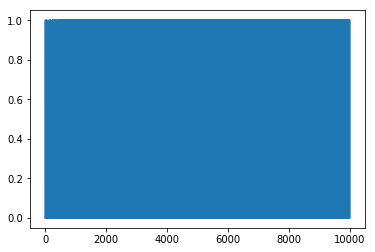

In [28]:
import gym

#Environment
env = gym.make('FrozenLake-v0')
env.reset()
num_states = env.observation_space.n
num_actions = env.action_space.n  
num_episodes = 10000
reward_list = []
batchsize = 32

#Agent
agent = DQNAgent(num_states, num_actions)  
var_s = []

#Train
for episode in range(num_episodes):
    finished = False
    state_zero = 0
    state_vector = agent.vectorize_state(state_zero)
    reward_sum = 0
    while not finished:
        
        #Main loop
        action = agent.act(state_vector)
        next_state_scalar, reward, finished, _ = env.step(action)
        next_state_vector = agent.vectorize_state(next_state_scalar)
        agent.remember(state_vector,action,reward,next_state_vector,finished)
        state_vector = next_state_vector
        reward_sum += reward
        #agent.learn([state_vector,action,reward,next_state_vector])
        
        #Check learning, want to see if the NN is converging
        var = np.var(agent.model.get_weights()[0].flatten())   #variance in weights
        var_s.append(var)
                
    #Learn after each episode
    if len(agent.memory) >= batchsize:
        agent.replay(batchsize)
    #var = np.var(agent.model.get_weights()[0].flatten())   #variance in weights
    #var_s.append(var) 
    reward_list.append(reward_sum)
    env.reset()
    
#Print stats
print "Score over time: " +  str(sum(reward_list)/num_episodes)
plt.plot(reward_list)
print "Final Q-Table Values"
agent.print_Qs()

Finally! Getting performance comparable to the Table. 

### Search hyperparameters

In [31]:
def run(gamma,epsilon):
    
    #Environment
    env = gym.make('FrozenLake-v0')
    env.reset()
    num_states = env.observation_space.n
    num_actions = env.action_space.n  
    num_episodes = 10000
    reward_list = []
    batchsize = 32

    #Agent
    agent = DQNAgent(num_states, num_actions)
    agent.gamma = gamma
    agent.epsilon = epsilon

    #Train
    for episode in range(num_episodes):
        finished = False
        state_zero = 0
        state_vector = agent.vectorize_state(state_zero)
        reward_sum = 0
        while not finished:

            #Main loop
            action = agent.act(state_vector)
            next_state_scalar, reward, finished, _ = env.step(action)
            next_state_vector = agent.vectorize_state(next_state_scalar)
            agent.remember(state_vector,action,reward,next_state_vector,finished)
            state_vector = next_state_vector
            reward_sum += reward

        #Learn after each episode
        if len(agent.memory) >= batchsize:
            agent.replay(batchsize)
            
        reward_list.append(reward_sum)
        env.reset()

    #Print stats
    #print "Score over time: " +  str(sum(reward_list)/num_episodes)
    return reward_list

In [ ]:
import time

gammas = [0.2,0.4,0.6,0.8,0.99]
eps = [0.2,0.4,0.6,0.8,0.99]

#gammas = [0.2,0.4]
#eps = [0.2, 0.4]

for i in range(len(gammas)):
    for j in range(len(eps)):
        gamma = gammas[i]
        epsilon = eps[j]
        t1 = time.time()
        reward_list = run(gamma, epsilon)
        t2 = time.time()
        print '(gamma, epsilon, score, T) = ' + str((gamma,epsilon,np.sum(reward_list) / 500.0, (t2-t1)/60.0))

### Baseline -- just using Q-tables

In [5]:
#Initialize table with all zeros
Q = np.zeros([env.observation_space.n,env.action_space.n])
# Set learning parameters
lr = .8
y = .95
num_episodes = 1000
#create lists to contain total rewards and steps per episode
#jList = []
rList = []
for i in range(num_episodes):
    #Reset environment and get first new observation
    s = env.reset()
    rAll = 0
    d = False
    j = 0
    #The Q-Table learning algorithm
    while j < 99:
        j+=1
        #Choose an action by greedily (with noise) picking from Q table
        a = np.argmax(Q[s,:] + np.random.randn(1,env.action_space.n)*(1./(i+1)))
        #Get new state and reward from environment
        s1,r,d,_ = env.step(a)
        #Update Q-Table with new knowledge
        Q[s,a] = Q[s,a] + lr*(r + y*np.max(Q[s1,:]) - Q[s,a])
        rAll += r
        s = s1
        if d == True:
            break
    #jList.append(j)
    rList.append(rAll)
    
print "Score over time: " +  str(sum(rList)/num_episodes)
print "Final Q-Table Values"
print Q

Score over time: 0.52
Final Q-Table Values
[[1.96317838e-01 2.52253700e-03 1.84336916e-02 1.65246608e-02]
 [3.33350057e-03 4.06910693e-03 2.67101255e-03 2.10738494e-01]
 [4.27830781e-03 3.55059227e-03 0.00000000e+00 1.07636921e-01]
 [7.02956830e-04 2.20111540e-03 2.15919483e-03 4.90879735e-02]
 [3.75676744e-01 3.25606239e-03 1.45667170e-03 1.67667806e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.13738664e-01 1.62768891e-05 1.43175308e-06 6.20232766e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [5.74443545e-05 6.03368308e-04 1.02493000e-02 3.15381353e-01]
 [6.17376276e-04 5.50168925e-01 2.78223213e-04 1.69717899e-03]
 [6.58548144e-01 1.96880508e-04 9.51677687e-04 4.16345690e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 6.43306984e-03 6.50613761e-01 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 9.36245349e-01 0.00000000e+00]
 [0.00000000

Ok, so about half.